In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('mnist.csv')   # read the csv file 

df_feat = df.drop('label',axis=1) # drop the label column

label_y = df['label'] # label column

Train Size:  0.9
i =  1
--------------------- 1e-07 ---------------------
Accuracy:  0.8509523809523809
Tree Depth:  45
-----------------------------------------------
i =  2
--------------------- 2e-07 ---------------------
Accuracy:  0.8547619047619047
Tree Depth:  45
-----------------------------------------------
i =  3
--------------------- 3e-07 ---------------------
Accuracy:  0.8597619047619047
Tree Depth:  45
-----------------------------------------------
i =  4
--------------------- 4e-07 ---------------------
Accuracy:  0.8566666666666667
Tree Depth:  45
-----------------------------------------------
i =  5
--------------------- 5e-07 ---------------------
Accuracy:  0.8519047619047619
Tree Depth:  45
-----------------------------------------------
i =  6
--------------------- 6e-07 ---------------------
Accuracy:  0.8511904761904762
Tree Depth:  45
-----------------------------------------------
i =  7
--------------------- 7e-07 ---------------------
Accuracy:  0.8569047

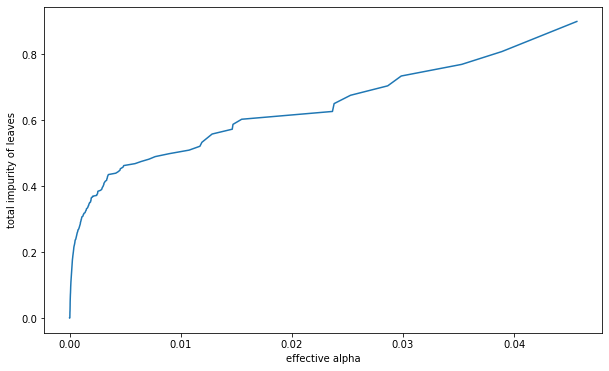

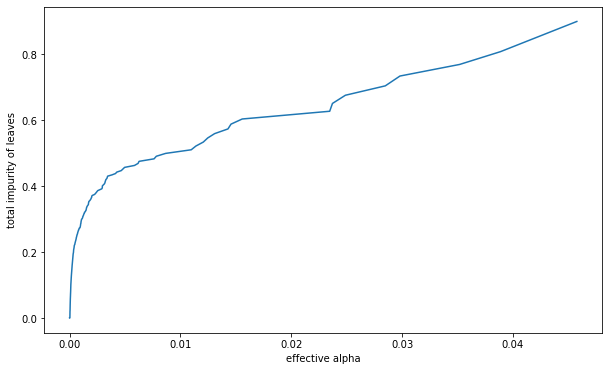

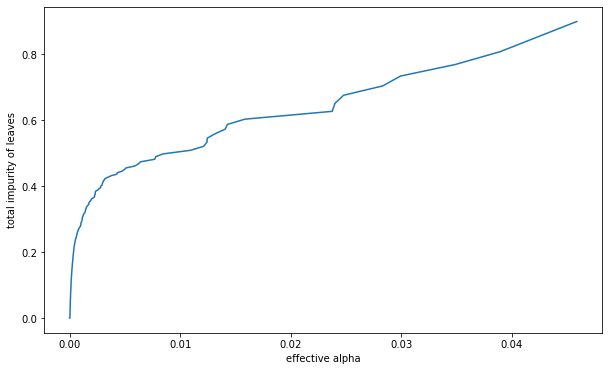

In [3]:
max_acc = np.array([[]]) # array to store the best accuracy

for j in range(1,4):        # loop to change the train size
    j=j/10
    print("Train Size: ",1-j)
    X_train,X_test,Y_train,Y_test = train_test_split(df_feat,label_y,test_size=j,random_state=72)       # split the data into train and test

    clf = DecisionTreeClassifier()      # create the decision tree classifier

    path = clf.cost_complexity_pruning_path(X_train,Y_train)    # find the ccp_alphas and impurities

    ccp_alphas, impurities = path.ccp_alphas, path.impurities   # store the ccp_alphas and impurities

    plt.figure(figsize=(10, 6))
    plt.plot(ccp_alphas, impurities)                            # plot the ccp_alphas and impurities
    plt.xlabel("effective alpha")
    plt.ylabel("total impurity of leaves")

    acc = np.array([])      # array to store the accuracy
    # we have kept the ccp_alpha from 0.0000001 to 0.0000010 as these values gave the best accuracy so we search within this range.
    for i in range(1,11):    # loop to change the ccp_alpha, this is basically the pruning parameter
        print('i = ', i)
        i=i/10000000
        clf = DecisionTreeClassifier(ccp_alpha=i)   # create the decision tree classifier
        clf.fit(X_train,Y_train)
        pred = clf.predict(X_test)      # predict the test data
        print("---------------------",i,"---------------------")
        
        report = classification_report(Y_test,pred,output_dict=True)
        print("Accuracy: ",report['accuracy'])
        acc = np.append(acc,report['accuracy'])
        tree_depth = clf.get_depth()        # find the tree depth
        print("Tree Depth: ", tree_depth)

        print("-----------------------------------------------")

    print("Best Accuracy: ",acc.max().round(3))
    max_acc=np.append(max_acc,acc.max().round(3))       # store the best accuracy
    
print("Best Accuracy: ",max_acc.max()," at Train Size = ",1-(max_acc.argmax()+1)/10)        # print the best accuracy

## Accuracy

We have got the best accuracy of 0.86 from ccp_alpha = 3e-07 and training size of 90%. The tree depth for this value is 45. We can see that the accuracy is increasing with the increase in the training size. The accuracy is decreasing with the increase in the ccp_alpha value. This is because the tree is getting pruned more and more. The accuracy is also decreasing with the increase in the tree depth. This is because the tree is getting overfitted.